In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.animation as animation

In [3]:
#Create lake graphic
#-1 = start, 0 = hole, 1 = frozen, 2 = end
lake = [[-1,1,1,1,1],[1,1,1,0,1],[1,0,1,1,1],[1,1,0,1,0],[0,1,1,1,2]]
lake = np.array(lake)
xlim = len(lake)
ylim = len(lake[0])

#for moves, -1=start, 0=right, 1=up, 2=left, 3=down
moves = [-1,0,0,0,0,3,3,2,1,-1,0,0,0,0,3,3,2,3,3,0]
x = [None]*(len(moves))
y = [None]*(len(moves))
xstart = 0.5
ystart = ylim-0.5

i = 0
for m in moves: 
    if m == 0:
        x[i] = x[i-1]+1
        y[i] = y[i-1]
    elif m == 1:
        x[i] = x[i-1]
        y[i] = y[i-1]+1
    elif m == 2:
        x[i] = x[i-1]-1
        y[i] = y[i-1]
    elif m == 3:
        x[i] = x[i-1]
        y[i] = y[i-1]-1
    else:
        x[i] = xstart
        y[i] = ystart
    i+=1

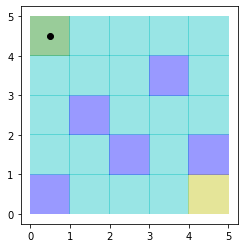

In [6]:
fig,ax = plt.subplots()
plt.xlim(0,xlim)
plt.ylim(0,ylim)
plt.axis('square')
colormap = ListedColormap(['g','b','c','y'])
c = ax.pcolor(np.linspace(0,xlim,xlim+1),np.linspace(0,ylim,ylim+1),list(lake[::-1]),cmap=colormap,alpha=0.4)       

line, = ax.plot(x[0],y[0],'ko-')

def animate(j):
    if j == 0:
        line.set_xdata(x[j])
        line.set_ydata(y[j])
    else:
        k=j
        while k > 0:
            if moves[k] == -1:
                break
            k = k-1
        line.set_xdata(x[k:j+1])
        line.set_ydata(y[k:j+1])
    return line,


ani = animation.FuncAnimation(fig, animate, interval=1, save_count=len(x))

plt.rcParams['animation.ffmpeg_path'] ='C:\\Program Files\\Python\\ffmpeg-20200713-7772666-win64-static\\bin\\ffmpeg.exe'
FFwriter=animation.FFMpegWriter(fps=10, extra_args=['-vcodec', 'libx264'])
ani.save('Visualization.mp4', writer=FFwriter)

plt.show()
